In [12]:
!pip3 install librosa
!pip3 install numba==0.48


  Using cached numba-0.48.0.tar.gz (2.0 MB)
  Using cached llvmlite-0.31.0.tar.gz (110 kB)
  Created wheel for numba: filename=numba-0.48.0-cp39-cp39-macosx_12_0_x86_64.whl size=2017993 sha256=d2128a695197062bca97d24fecb33fbfcc2fc1e60729c1249d3e7a711c094dcc
  Stored in directory: /Users/spartan/Library/Caches/pip/wheels/67/f4/34/43855bda1e661dc1afedcb295d313a510239d901336fd636c3
  ERROR: Command errored out with exit status 1:
   command: /Users/spartan/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/pip-install-8e101ffb/llvmlite_2d73ba53e2b1462889f18c46621149b7/setup.py'"'"'; __file__='"'"'/private/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/pip-install-8e101ffb/llvmlite_2d73ba53e2b1462889f18c46621149b7/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().re

In [ ]:
# import librosa
# import numpy as np
# audio_data = "/content/drive/My Drive/101_1b1_Al_sc_Meditron.wav"
# x , sr = librosa.load(audio_data)
# print(type(x), type(sr))
# print(x.shape, sr)

In [5]:
import librosa
import numpy as np
audio_data = "./002.wav"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(220160,) 22050


In [6]:
librosa.load(audio_data, sr=44100)

(array([ 0.00085449,  0.0007019 ,  0.00067139, ..., -0.00588989,
        -0.00332642, -0.00125122], dtype=float32),
 44100)

In [7]:
import IPython.display as ipd
ipd.Audio(audio_data)

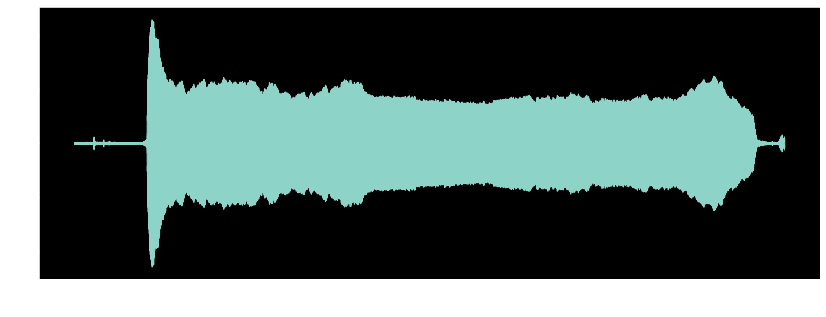

In [20]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

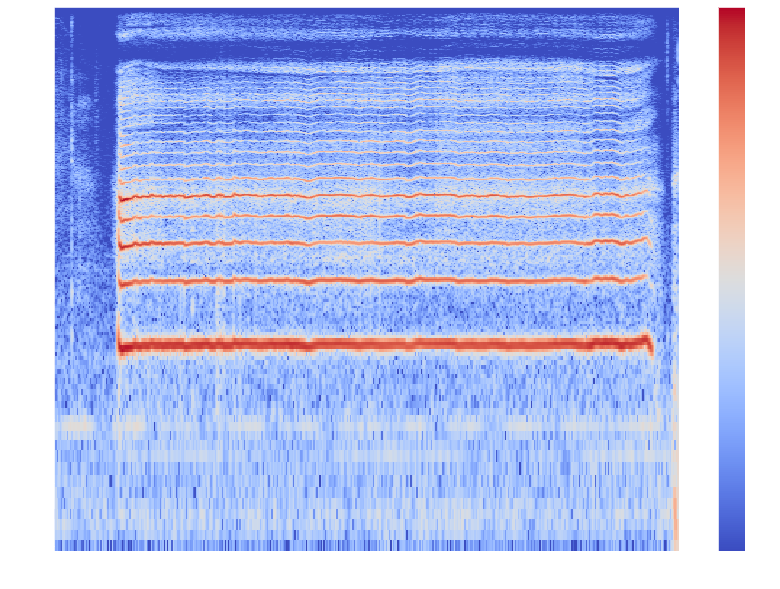

In [21]:
# Spectrogram
import matplotlib.pyplot as plt
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 10))
 
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/2714910752.py:3: FutureWarning: Pass y=[ 0.00057831  0.00074888  0.00061582 ... -0.00035548 -0.00715489
 -0.0032735 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


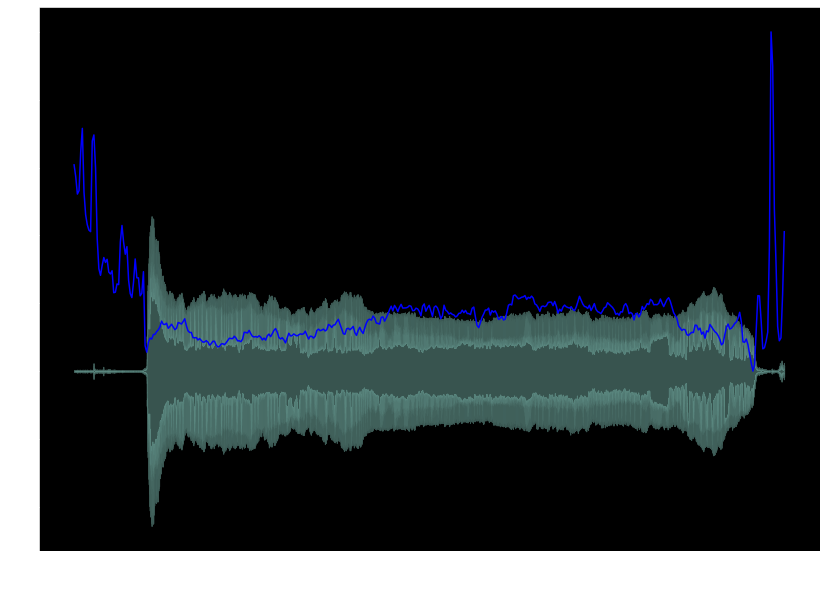

In [23]:
# Spectral Centroid
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
plt.figure(figsize=(14, 10))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/3989764334.py:2: FutureWarning: Pass y=[0.01057831 0.01074888 0.01061582 ... 0.00964452 0.00284511 0.0067265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


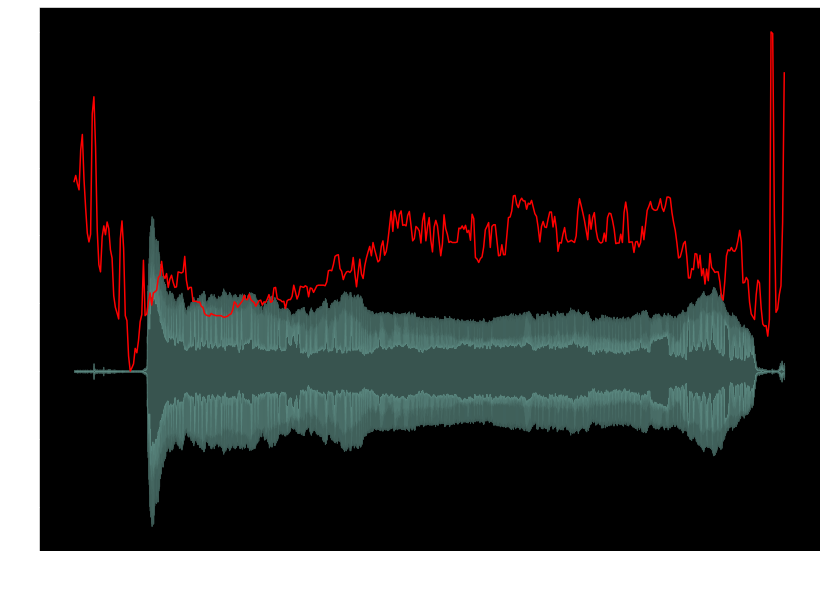

In [25]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(14, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/2106015379.py:2: FutureWarning: Pass y=[0.01057831 0.01074888 0.01061582 ... 0.00964452 0.00284511 0.0067265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/2106015379.py:3: FutureWarning: Pass y=[0.01057831 0.01074888 0.01061582 ... 0.00964452 0.00284511 0.0067265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/2106015379.py:4: FutureWarning: Pass y=[0.01057831 0.01074888 0.01061582 ... 0.00964452 0.00284511 0.0067265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth

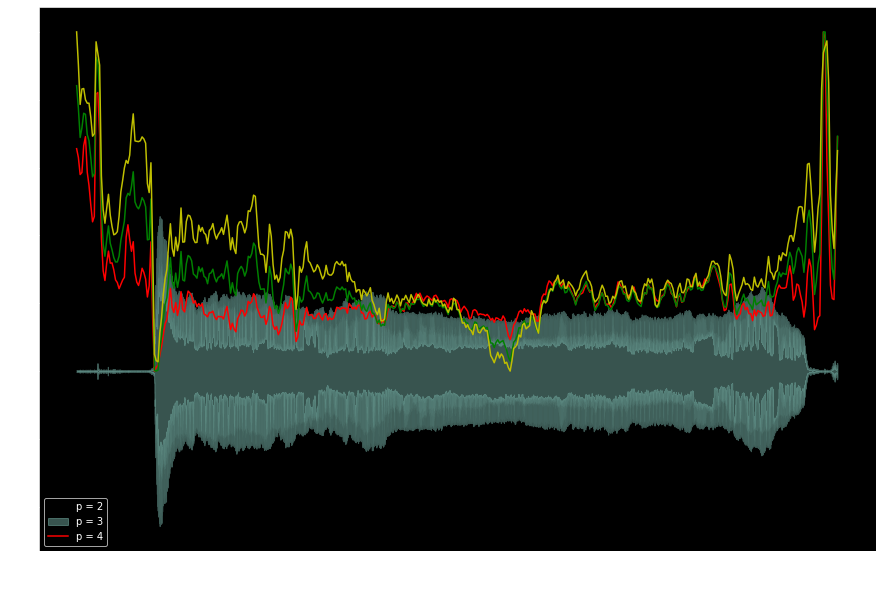

In [27]:
# Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

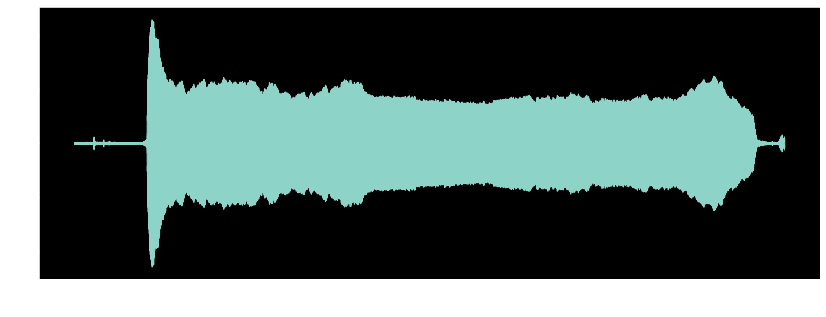

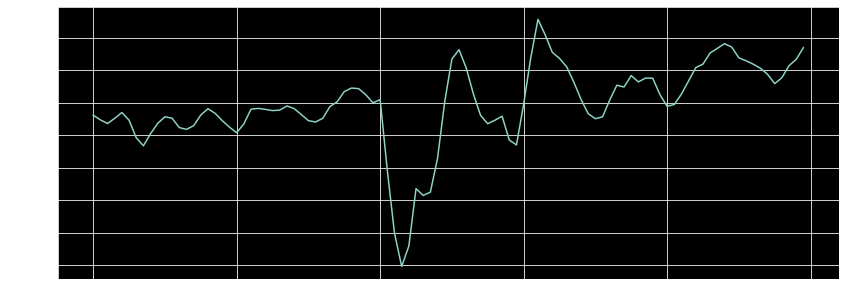

In [29]:
# Zero-Crossing Rate
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [31]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

11


(20, 431)


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/397125404.py:1: FutureWarning: Pass y=[ 0.00057831  0.00074888  0.00061582 ... -0.00035548 -0.00715489
 -0.0032735 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


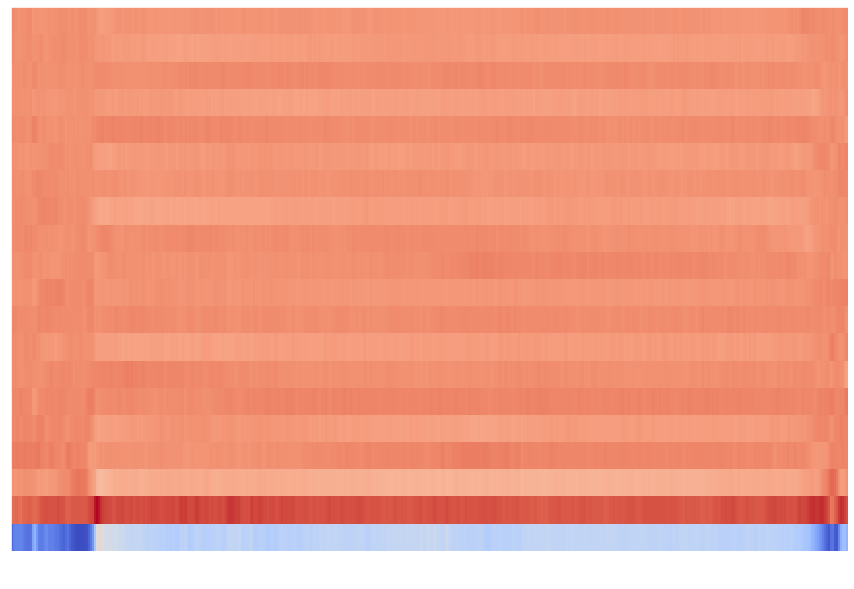

In [32]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [33]:
librosa.load(audio_data, sr=44100)

(array([ 0.00085449,  0.0007019 ,  0.00067139, ..., -0.00588989,
        -0.00332642, -0.00125122], dtype=float32),
 44100)

In [34]:
ipd.Audio(audio_data)

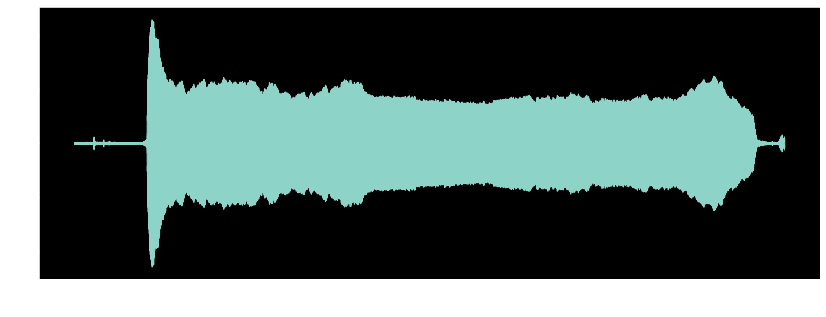

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

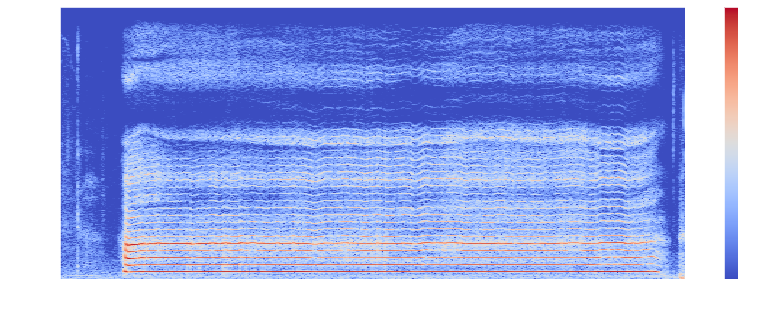

In [37]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

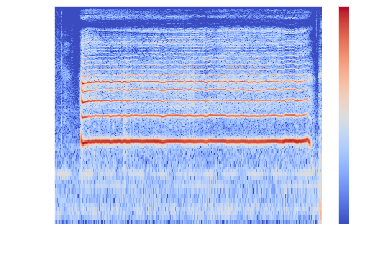

In [38]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [39]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# (775,)
# # Computing the time variable for visualization
# plt.figure(figsize=(12, 4))frames = range(len(spectral_centroids))
# t = librosa.frames_to_time(frames)
# # Normalising the spectral centroid for visualisation
# def normalize(x, axis=0):
#     return sklearn.preprocessing.minmax_scale(x, axis=axis)
# #Plotting the Spectral Centroid along the waveform
# librosa.display.waveshow(x, sr=sr, alpha=0.4)
# plt.plot(t, normalize(spectral_centroids), color='b')

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/2265359450.py:2: FutureWarning: Pass y=[ 0.00057831  0.00074888  0.00061582 ... -0.00035548 -0.00715489
 -0.0032735 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


(431,)

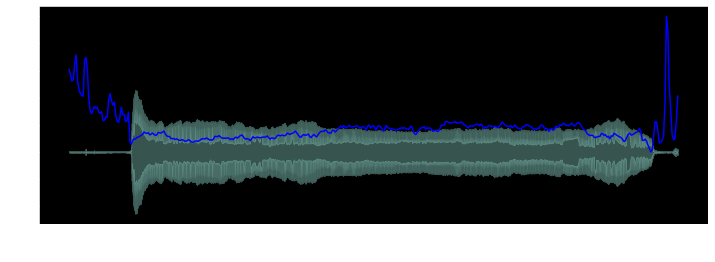

In [40]:
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/3508554141.py:1: FutureWarning: Pass y=[0.01057831 0.01074888 0.01061582 ... 0.00964452 0.00284511 0.0067265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]


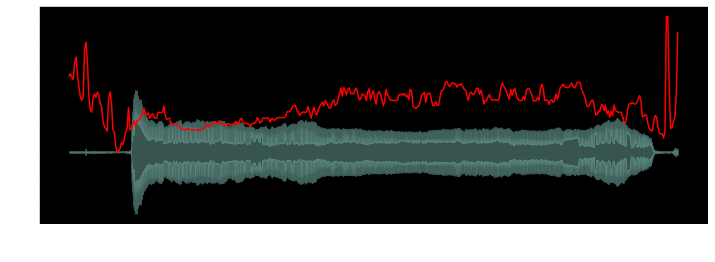

In [41]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/5576424.py:1: FutureWarning: Pass y=[0.01057831 0.01074888 0.01061582 ... 0.00964452 0.00284511 0.0067265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/5576424.py:2: FutureWarning: Pass y=[0.01057831 0.01074888 0.01061582 ... 0.00964452 0.00284511 0.0067265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/5576424.py:3: FutureWarning: Pass y=[0.01057831 0.01074888 0.01061582 ... 0.00964452 0.00284511 0.0067265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_4 = libr

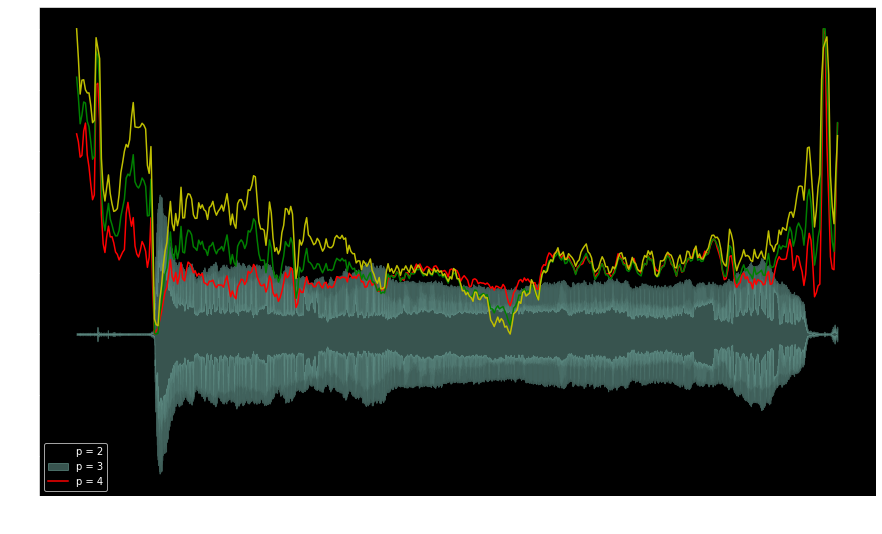

In [42]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [43]:
mfccs = librosa.feature.mfcc(x, sr)
print(mfccs.shape)


(20, 431)


/var/folders/3m/l7h25c9d0mj46kv1xkbdmb0c0000gr/T/ipykernel_25431/929948438.py:1: FutureWarning: Pass y=[ 0.00057831  0.00074888  0.00061582 ... -0.00035548 -0.00715489
 -0.0032735 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr)


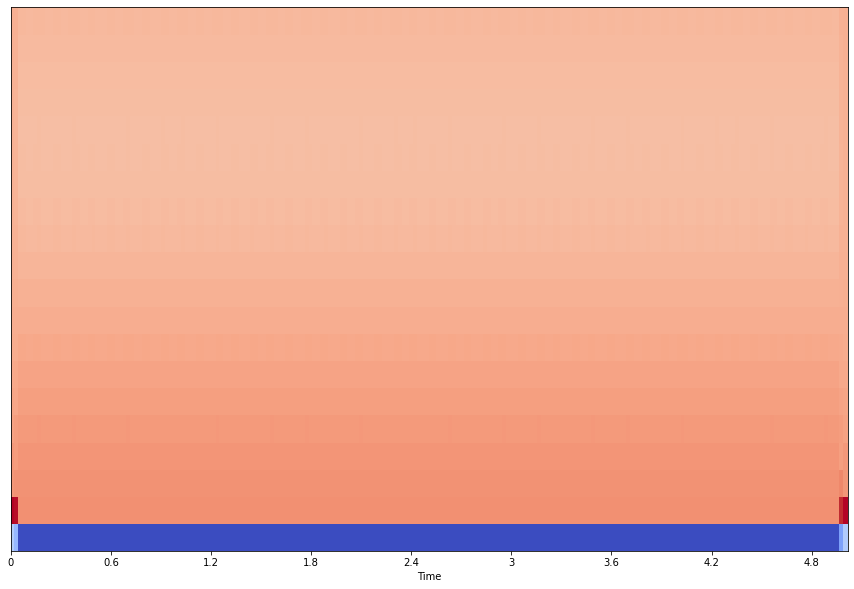

In [ ]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')